In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import math
import sys
import ROOT
np.set_printoptions(threshold=sys.maxsize)
import dunestyle.matplotlib as dunestyle
import time

/home/leoperes/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


DUNE plot style enabled


In [2]:
#path = '/media/leoperes/Acer/Users/le0_p/'
path='~/Dropbox/BoostedDM/ntuples2023/'
fAtm_00a = ROOT.TFile.Open(path+'atm_hA_BR_4ana_syst_new.root')

In [3]:
reco = fAtm_00a.Get("ana/Atm")
true = fAtm_00a.Get("ana/AllEvents")

In [4]:
CosSunThetaRecoRange_wShw_hist = reco.Draw("DiffCosAngleTotalMom", "", "goff")
CosSunThetaRecoRange_wShw = np.asarray(np.frombuffer(reco.GetV1(), dtype=float, count=CosSunThetaRecoRange_wShw_hist))
CosSunThetaRecoRange_wShw = CosSunThetaRecoRange_wShw.copy()

CVN_NCScore_hist = reco.Draw("CVN_NCScore", "", "goff")
CVN_NCScore = np.asarray(np.frombuffer(reco.GetV1(), dtype=float, count=CVN_NCScore_hist))
CVN_NCScore = CVN_NCScore.copy()

CCNCBgAllEvts = reco.Draw("CCNC", "", "goff")
CCNC_Bg_AllEvts = np.asarray(np.frombuffer(reco.GetV1(), dtype=np.float64, count=CCNCBgAllEvts))
CCNC_Bg_AllEvts = CCNC_Bg_AllEvts.copy()

NHits_BgAllEvts = reco.Draw("NHits", "", "goff")
NHits_BgAllEvts = np.asarray(np.frombuffer(reco.GetV1(), dtype=np.float64, count=NHits_BgAllEvts))


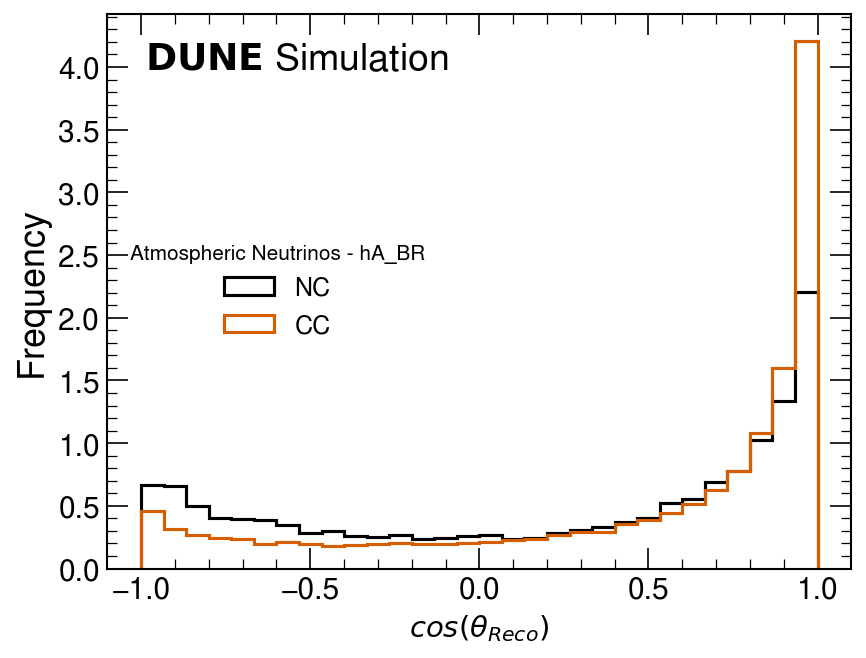

In [5]:
plt.figure(dpi=150)
plt.hist(CosSunThetaRecoRange_wShw[CCNC_Bg_AllEvts == 1], bins = 30, density = 1,histtype='step', label= 'NC')
plt.hist(CosSunThetaRecoRange_wShw[CCNC_Bg_AllEvts == 0], bins = 30, density = 1,histtype='step', label= 'CC')
plt.xlabel(r'$cos(\theta_{Reco})$', fontsize=14)
plt.ylabel('Frequency')
#plt.title('Angle of the Total Momentum Reco w.r.t True - Normalized histograms', fontsize=10)
plt.legend(title = r'Atmospheric Neutrinos - hA_BR')
dunestyle.Simulation()
plt.savefig('AngularStudiesPlots/CosCCNC_'+str(time.strftime("%Y%m%d"))+'.pdf', format='pdf')
plt.show()

In [6]:
CCNC_Bg_AllEvts = CCNC_Bg_AllEvts[CVN_NCScore > -1.] 
NHits_BgAllEvts = NHits_BgAllEvts[CVN_NCScore > -1.] 
CVN_NCScore = CVN_NCScore[CVN_NCScore > -1.]


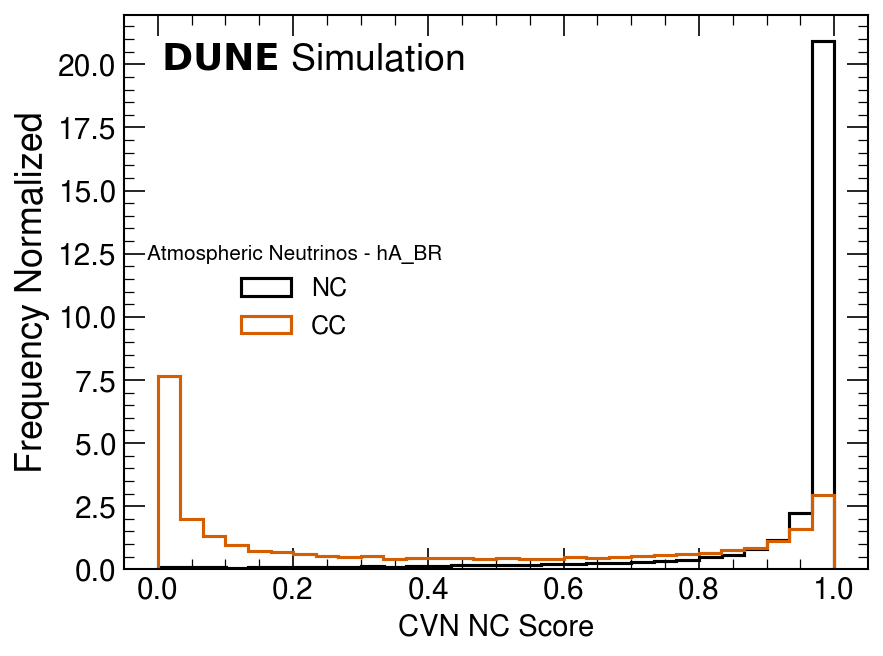

In [7]:
plt.figure(dpi=150)
plt.hist(CVN_NCScore[CCNC_Bg_AllEvts == 1], bins = 30, density = 1,histtype='step', label= 'NC')
plt.hist(CVN_NCScore[CCNC_Bg_AllEvts == 0], bins = 30, density = 1,histtype='step', label= 'CC')
plt.xlabel(r'CVN NC Score', fontsize=14)
plt.ylabel('Frequency Normalized')
#plt.title('Angle of the Total Momentum Reco w.r.t True - Normalized histograms', fontsize=10)
plt.legend(title = r'Atmospheric Neutrinos - hA_BR')
dunestyle.Simulation()
plt.savefig('CVN_CCNC_'+str(time.strftime("%Y%m%d"))+'.pdf', format='pdf')
plt.show()

In [8]:
a_nc =CVN_NCScore[CCNC_Bg_AllEvts == 1]
a_cc =CVN_NCScore[CCNC_Bg_AllEvts == 0]

print(a_cc[a_cc>0.5].size/a_cc.size)

0.41214850882531956


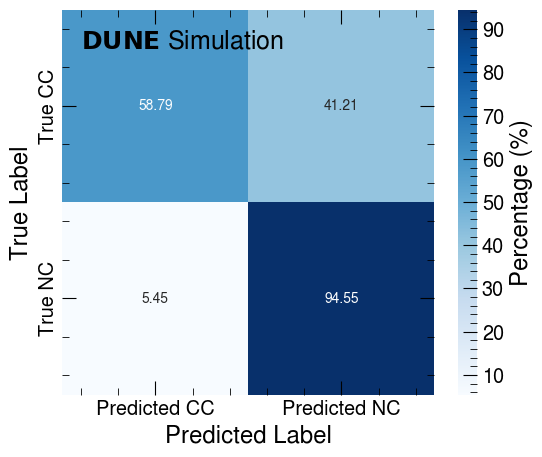

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define true labels
true_labels = CCNC_Bg_AllEvts  # True event classification (0 = CC, 1 = NC)

# Define predicted labels based on CVN_NCScore threshold
pred_labels = (CVN_NCScore > 0.5).astype(int)  # 1 = Predicted NC, 0 = Predicted CC

# Compute confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Normalize to percentages row-wise (each true label sums to 100%)
cm_percent = cm.astype(float) / cm.sum(axis=1, keepdims=True) * 100  # Row-wise normalization

# Plot confusion matrix as a heatmap
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap='Blues', xticklabels=['Predicted CC', 'Predicted NC'], 
            yticklabels=['True CC', 'True NC'], cbar_kws={'label': 'Percentage (%)'})

ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
#ax.set_title("Confusion Matrix for CVN NC Score > 0.5 (Row Normalized)")

dunestyle.Simulation()
# Save and show
plt.savefig('CVN_ConfusionMatrix_Percentage_' + str(time.strftime("%Y%m%d")) + '.pdf', format='pdf')
plt.show()

In [10]:
CVN_NCScore.size

53006

In [11]:
NHits_BgAllEvts.size

53006

/tmp/ipykernel_161424/2871077938.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=r'Atmospheric Neutrinos - hA_BR')


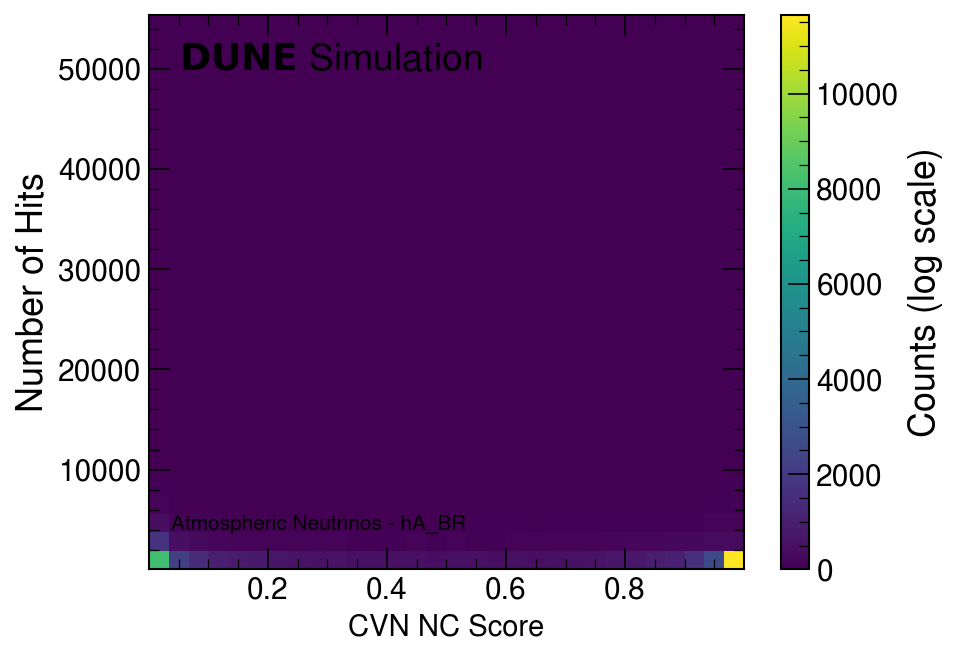

In [18]:
import matplotlib.colors as mcolors

plt.figure(dpi=150)

# 2D Histogram with log scale
hist, xedges, yedges, img = plt.hist2d(
    CVN_NCScore, NHits_BgAllEvts, 
    bins=(30, 30), 
    cmap='viridis'  # Use a perceptually uniform colormap
)

# Set y-axis to log scale
#plt.yscale('log')

# Add color bar
cbar = plt.colorbar()
cbar.set_label("Counts (log scale)")

# Labels and formatting
plt.xlabel(r'CVN NC Score', fontsize=14)
plt.ylabel('Number of Hits')
plt.legend(title=r'Atmospheric Neutrinos - hA_BR')
dunestyle.Simulation()

# Save and show
plt.savefig('CVN_CCNC_Hits_'+str(time.strftime("%Y%m%d"))+'.pdf', format='pdf')
plt.show()

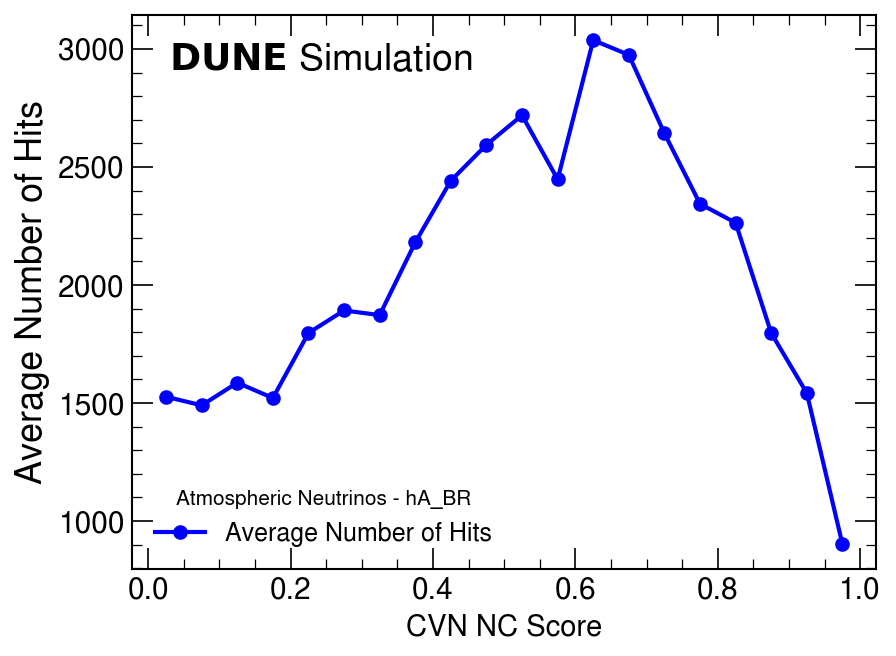

In [21]:
# Define bin edges for CVN_NCScore in intervals of 0.05
bin_edges = np.arange(0, 1.05, 0.05)  # Bins from 0 to 1 with step 0.05
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Compute average NHits per bin
bin_indices = np.digitize(CVN_NCScore, bin_edges) - 1  # Assign each score to a bin
avg_nhits = [NHits_BgAllEvts[bin_indices == i].mean() for i in range(len(bin_centers))]

# Plot
plt.figure(dpi=150)
plt.plot(bin_centers, avg_nhits, marker='o', linestyle='-', color='b', label='Average Number of Hits')

# Set y-axis to log scale
#plt.yscale('log')

# Labels and formatting
plt.xlabel(r'CVN NC Score', fontsize=14)
plt.ylabel('Average Number of Hits')
plt.legend(title=r'Atmospheric Neutrinos - hA_BR')
dunestyle.Simulation()

# Save and show
plt.savefig('CVN_AvgNHits_'+str(time.strftime("%Y%m%d"))+'.pdf', format='pdf')
plt.show()